# Loan Prediction

## Import Libraries & Data

In [137]:
import numpy as np                          
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [138]:
df = pd.read_excel("loan.xlsx")

In [139]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Preparation & Cleaning

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [141]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [142]:
df["TotalIncome"] = df.ApplicantIncome + df.CoapplicantIncome
df["TotalIncome_log"] = np.log(df.TotalIncome)

df["LoanAmount_log"] = np.log(df.LoanAmount)

In [143]:
df["Gender"].fillna(df.Gender.mode()[0], inplace= True)
df["Married"].fillna(df.Married .mode()[0], inplace= True)
df["Dependents"].fillna(df.Dependents.mode()[0], inplace= True)
df["Self_Employed"].fillna(df.Self_Employed.mode()[0], inplace= True)
df["Loan_Amount_Term"].fillna(df.Loan_Amount_Term.mode()[0], inplace= True)
df["Credit_History"].fillna(df.Credit_History.mode()[0], inplace= True)

df["LoanAmount"] = df.LoanAmount.fillna(df.LoanAmount.mean())
df["LoanAmount_log"] = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
LoanAmount_log       0
dtype: int64

In [144]:
df.replace("3+", 3, inplace=True)

## Data/Inputs Distribution

### Distribution by gender

Male      502
Female    112
Name: Gender, dtype: int64


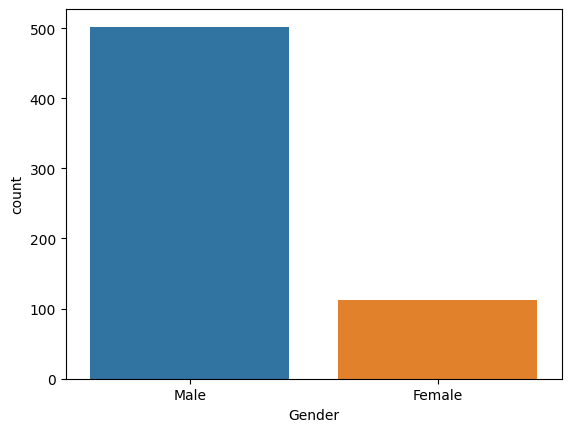

In [145]:
print(df.Gender.value_counts())
sns.countplot(x="Gender", data=df)
plt.show()

### Distribution by marital status

Yes    401
No     213
Name: Married, dtype: int64


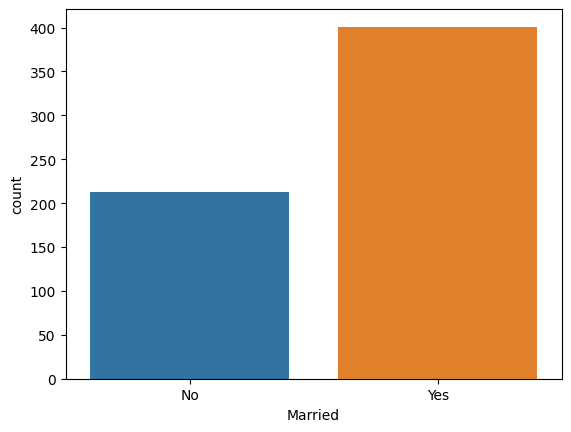

In [146]:
print(df.Married.value_counts())
sns.countplot(x="Married", data=df)
plt.show()

### Distribution by Dependents 

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


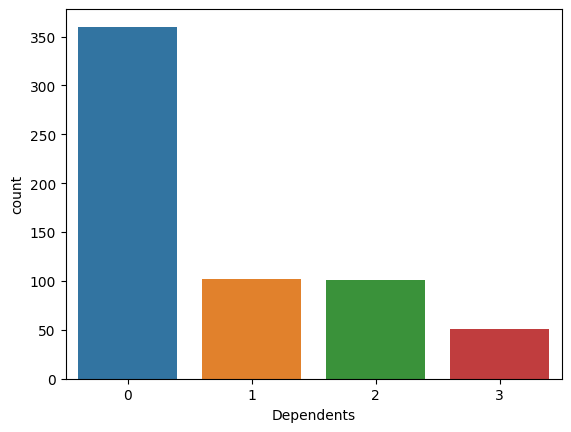

In [147]:
print(df.Dependents.value_counts())
sns.countplot(x="Dependents", data=df)
plt.show()

### Distribution by Self Employed 

No     532
Yes     82
Name: Self_Employed, dtype: int64


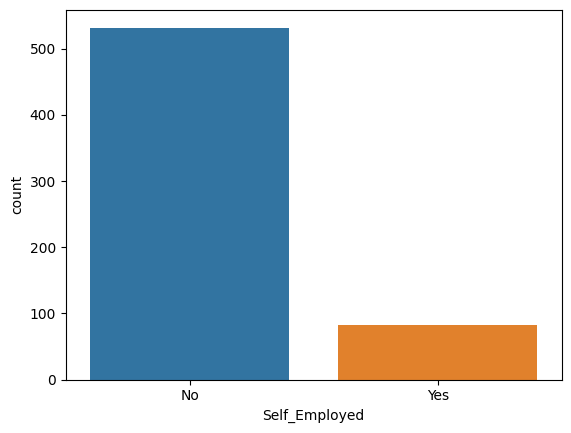

In [148]:
print(df.Self_Employed.value_counts())
sns.countplot(x="Self_Employed", data=df)
plt.show()

### Distribution by Credit History 

1.0    525
0.0     89
Name: Credit_History, dtype: int64


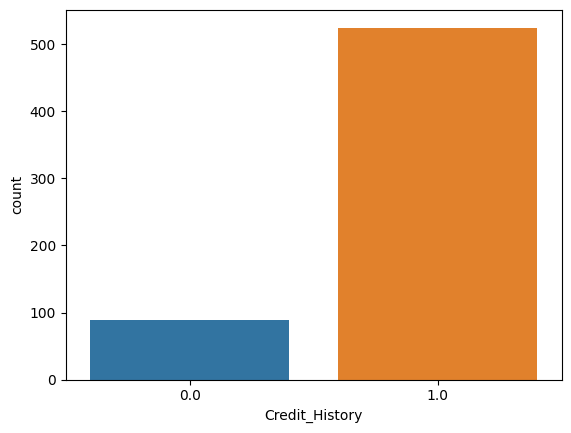

In [149]:
print(df.Credit_History.value_counts())
sns.countplot(x="Credit_History", data=df)
plt.show()

### Distribution by LoanAmount

4.857444    22
4.787492    20
4.700480    17
4.605170    15
5.075174    12
            ..
5.480639     1
5.365976     1
4.077537     1
5.111988     1
5.533389     1
Name: LoanAmount_log, Length: 204, dtype: int64


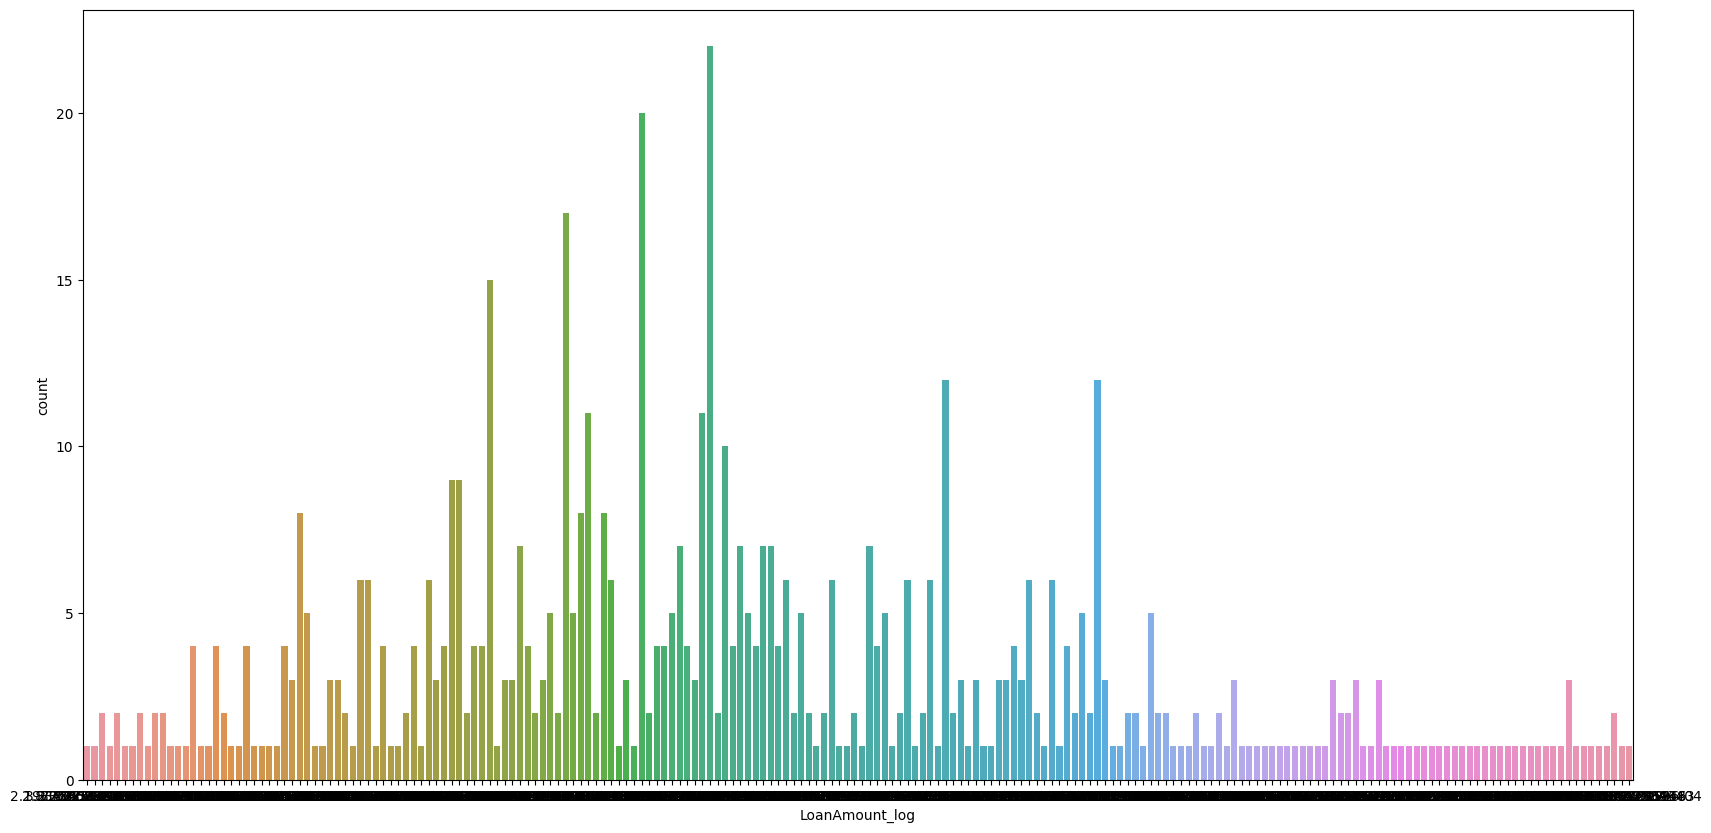

In [150]:
print(df.LoanAmount_log.value_counts())

plt.figure(figsize=(20,10))
sns.countplot(x="LoanAmount_log", data=df)
plt.show()

### Test Train split

In [151]:
x = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:,12].values

x.shape , y.shape

((614, 8), (614,))

In [152]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y, test_size=0.22 , random_state=42)

In [153]:
X_train.shape[0], X_test.shape

(478, (136, 8))

## Data Normalization & Standartization

In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_train[:,0] = le.fit_transform(X_train[:,0])
X_train[:,1] = le.fit_transform(X_train[:,1])
X_train[:,3] = le.fit_transform(X_train[:,3])

le_y  = LabelEncoder()
y_train = le_y.fit_transform(y_train)

y_train[0:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [155]:
le1 = LabelEncoder()

X_test[:,0] = le1.fit_transform(X_test[:,0])
X_test[:,1] = le1.fit_transform(X_test[:,1])
X_test[:,3] = le1.fit_transform(X_test[:,3])

le_y1  = LabelEncoder()
y_test = le_y1.fit_transform(y_test)

y_test[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [156]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

## Predictions

### Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [158]:
y_pred = rf.predict(X_test)
y_pred[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [159]:
from sklearn import metrics

metrics.accuracy_score(y_pred,y_test)

0.75

### Naive Bayes

In [160]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred1 = nb.predict(X_test)
y_pred1[0:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [161]:
metrics.accuracy_score(y_pred1,y_test)

0.7794117647058824

### Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred2 = lr.predict(X_test)
y_pred2[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [163]:
metrics.accuracy_score(y_pred2,y_test)

0.7720588235294118

### KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier

scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

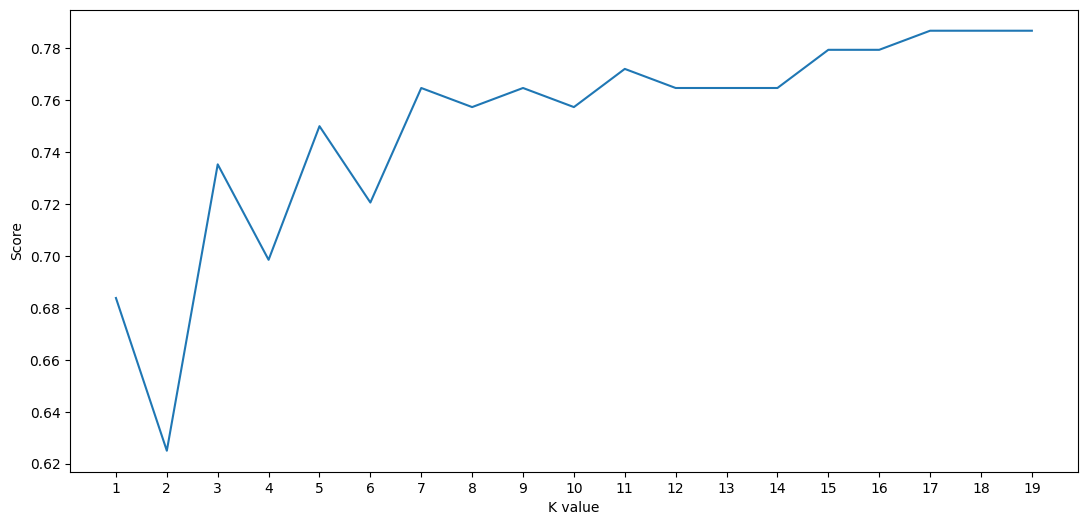

KNN with 9 neigbors give us the best accuracy of 0.7647058823529411


In [165]:
plt.figure(figsize=(13,6))   
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

print(f"KNN with 9 neigbors give us the best accuracy of {scoreList[8]}")